# **Trilha 4: Tarefa (Peso 3)**

Empregue no mínimo duas bases de dados (tabelas) extraídas de um ou ambos os sites abaixo: 

 

a. https://wid.world/ ; 

b. https://www.gapminder.org/  

 

E faça uma Exploração dos Dados EDA de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados. 

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta. 

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão. 

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 

# **Introdução**

Para realização desta análise foram utilizados os dados do site Gapminder. O dataframe escolhido possui dados sobre a Pobreza no Mundo. Essa atividade permitiu o treino prático em processo EDA bem como o treino em gráficos e análise posterior.  

# Perguntas:



# **1.   Em que período o índice de Gini melhorou no Brasil?**
  
  Com a utilização do gráfico de barras foi verificada a variação do Gini entre 1980 e 2018, onde é possível observar uma piora entre 1980 e 1988, melhora entre 1988 e 1991, piora em 1992 e uma melhora entre 1993 e 2014. A melhora de 20 anos é interrompida e tem início de piora em 2015.

# **2.   Como o Brasil se posiciona no índice de Gini em relação aos demais países do mundo?**

  Comparando os dados de Gini do Brasil com os do Mundo, utilizei o gráfico boxplot para melhor visualização. Considerando quanto maior o índice, pior a desigualdade do país. É possível concluir que o Brasil está com índice muito ruim de Gini, estando muito distante da média mundial. 

# **3. Em que período houve mais dados sobre a pobreza no Brasil?**

  Utilizando um gráfico de linha com a densidade dos dados é possui observar que houve mais dados entre 1985 e 2015, com um crescimento ainda maior entre 2005 e 2010.

# **4. Como a pobreza urbana e rural do Brasil se modificaram com o tempo?**

  Utiliza-se o gráfico boxplot para analizar a pobreza rural no Brasil. É possível observar que a média da pobreza rural no Brasil está acima da média mundial de pobreza. Realizando essa analise com a pobreza urbana no Brasil verifica-se que a média é menor que a média mundial, está abaixo da média.

  
  
  Gerando gráfico de barras Pobreza Rural no Brasil entre 1997 e 2002. Aprensenta dados claros. Permite inferir situação de queda mas o dataframe não possui dados suficientes dos demais anos. Também utilizando o mesmo tipo de gráfico é possível observar o aumento da pobreza urbana no Brasil no mesmo período. Concluindo, utilizando um gráfico comparativo entre pobreza urbana x pobreza rural no Brasil por período é possivel obsevar aumento da pobreza urbana e redução da pobreza rural no Brasil. Pelo campo valor é possivel observar que a pobreza rural é muito maior.









# **Conclusão**

Foi possível realizar a análise requisitada utilizando as técnicas aprendidas em aula. Com este treino foi possível identificar dificuldades em alguns processos que precisarão ser aperfeiçoados com muita prática, como uso de dataframes com metadados e dados em diversas disposições.

In [43]:
# Importando Bibliotecas e adicionando seus respectivos alias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [44]:
#Importando os df: Gini, Rural, Urban
# Fonte: https://www.gapminder.org/data

dfGini = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')
dfRural = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/rural.csv')
dfUrban = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/urban.csv')


In [45]:
# verificando o formato do df
dfGini.head()


,country,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,NaN,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9


In [46]:
# tratando os dados, transferindo dados de ano de colunas para linhas, e seus respectivos valores
dfGini = pd.melt(dfGini.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)
dfGini.head()

,country,index,ano,valor
8683,Zimbabwe,166,2018,50.3
8349,Zimbabwe,166,2016,44.3
7347,Zimbabwe,166,2010,43.2
166,Zimbabwe,166,1966,NaN
333,Zimbabwe,166,1968,NaN


In [47]:
# transformando campo ano para o formato data

dfGini.ano = pd.to_datetime(dfGini.ano, format='%Y',errors='coerce')
display(dfGini.dtypes)

country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

([<matplotlib.axis.XTick at 0x7fe593f6a390>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

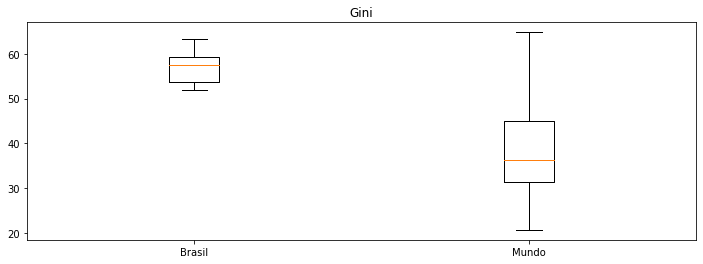

In [48]:
# comparando dados Gini Brasil x Mundo, com gráfico boxplot 
# É possível concluir que o Brasil está com índice muito ruim de Gini, estando muito abaixo da média mundial.

dfGini_not_null = dfGini[ ~ np.isnan( dfGini.valor )]

plt.figure(figsize=(12,4))
plt.boxplot(dfGini_not_null[dfGini_not_null.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfGini_not_null.valor,positions=[2],showfliers=False)
plt.title('Gini')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

In [49]:
# tratando valores vazios

dfGini2 = dfGini_not_null.sort_values(['country', 'ano'])

In [50]:
dfGini2.head()

,country,index,ano,valor
4677,Albania,1,1995-01-01,27.0
5679,Albania,1,2001-01-01,31.7
6180,Albania,1,2004-01-01,30.6
6681,Albania,1,2007-01-01,30.0
7349,Albania,1,2011-01-01,29.0


In [52]:
# resetando o index

dfGini = dfGini.reset_index()
dfGini.head()

,level_0,country,index,ano,valor
0,8683,Zimbabwe,166,2018-01-01,50.3
1,8349,Zimbabwe,166,2016-01-01,44.3
2,7347,Zimbabwe,166,2010-01-01,43.2
3,166,Zimbabwe,166,1966-01-01,NaN
4,333,Zimbabwe,166,1968-01-01,NaN


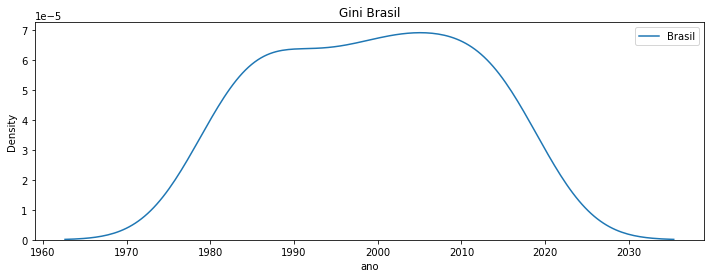

In [53]:
# Mostra a densidade dos dados conforme o período:

plt.figure(figsize=(12,4))
sns.kdeplot(dfGini2[dfGini2.country == 'Brazil'].ano,label='Brasil')
# sns.kdeplot(dfGini_not_null.ano,label='Mundo')
plt.title('Gini Brasil')
plt.legend()
plt.show()

# Houve mais dados entre 1985 e 2015, com um crescimento maior entre 2005 e 2010.


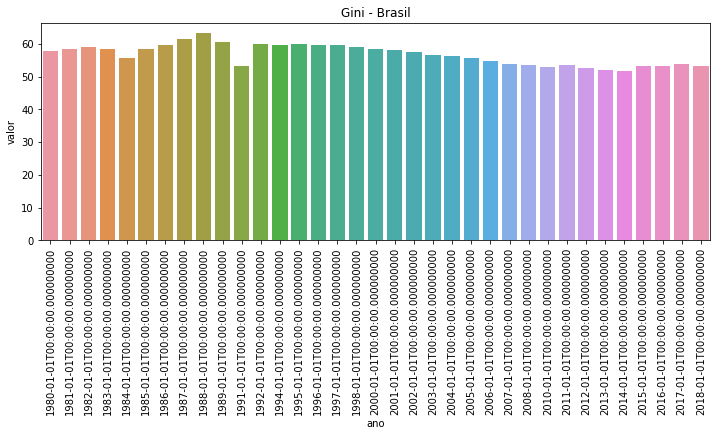

In [54]:
# Verificando a variação do Gini entre 1980 e 2018:
# É possível observar uma piora entre 1980 e 1988, melhora entre 1988 e 1991, piora em 1992 e uma melhora entre 1993 e 2014.
# A melhora de 20 anos é interrompida e tem início de piora em 2015.

plt.figure(figsize=(12,4))
sns.barplot(x=dfGini2[dfGini2.country == 'Brazil'].ano, y=dfGini2[dfGini2.country == 'Brazil'].valor)
plt.title('Gini - Brasil')
# plt.hlines(dfGini2.valor.mean(),-0.5,7.5,color='r', linestyles=':')
# plt.text(0, dfGini2.valor.mean()+1,'Média de valor')
plt.xticks(rotation=90)
plt.show()

### **Tratando dados Dataframe Rural**

In [55]:
# Convertendo dados de colunas para linhas

dfRural2 = pd.melt(dfRural.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)
dfRural2.head()

,country,index,ano,valor
759,Zimbabwe,75,1995,48.0
379,Zimbabwe,75,1990,35.8
75,Zimbabwe,75,1984,NaN
151,Zimbabwe,75,1987,NaN
227,Zimbabwe,75,1988,NaN


In [56]:
# Convertendo campo ano

dfRural2.ano = pd.to_datetime(dfRural2.ano, format='%Y',errors='coerce')
display(dfRural2.dtypes)

country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

([<matplotlib.axis.XTick at 0x7fe59440bd10>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

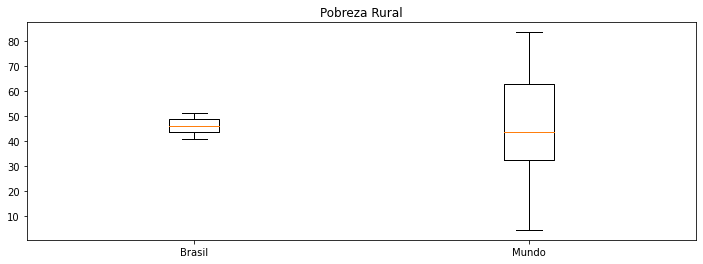

In [15]:
# Gerando gráfico de Pobreza Rural
# Como o gráfico boxplot é possível observar que a média da pobreza rural no Brasil está acima da média mundial de pobreza.

dfRural3 = dfRural2.sort_values(['country', 'ano'])
dfRural4 = dfRural3[ ~ np.isnan( dfRural3.valor )]

plt.figure(figsize=(12,4))
plt.boxplot(dfRural4[dfRural4.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfRural4.valor,positions=[2],showfliers=False)
plt.title('Pobreza Rural')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

Text(0.5, 1.0, 'Pobreza Rural - Brasil')

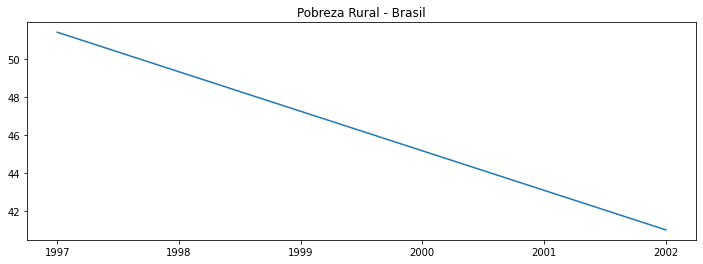

In [16]:
plt.figure(figsize=(12,4))
plt.plot(dfRural4[dfRural4.country == 'Brazil'].ano, dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')

# Gráfico mostra uma situação de queda

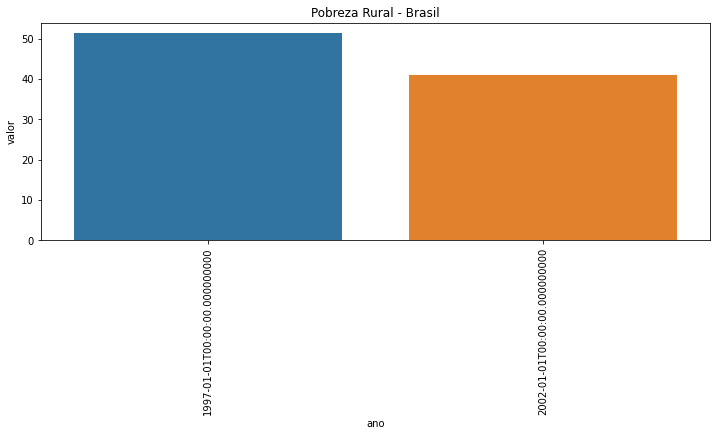

In [17]:
# Gerando gráfico de barras Pobreza Rural no Brasil. Aprensenta dados claros. 
# Permite inferir situação de queda mas o dataframe não possui dados suficientes dos demais anos.

plt.figure(figsize=(12,4))
sns.barplot(x=dfRural4[dfRural4.country == 'Brazil'].ano, y=dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')
# plt.hlines(dfRural4.valor.mean(),-0.5,7.5,color='r', linestyles=':')
# plt.text(0, dfRural4.valor.mean()+1,'Média de valor')
plt.xticks(rotation=90)
plt.show()

In [18]:
dfRural4.head()

,country,index,ano,valor
1140,Albania,0,2001-01-01,29.6
91,Algeria,15,1987-01-01,16.6
623,Algeria,15,1994-01-01,30.3
913,Armenia,1,1998-01-01,50.8
1065,Armenia,1,2000-01-01,48.7


### **Tratando dados Dataframe Urbano**

In [19]:
# Convertendo campos de Ano para linhas

dfUrban2 = pd.melt(dfUrban.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)

In [20]:
#Tratando o formato data

dfUrban2.ano = pd.to_datetime(dfUrban2.ano, format='%Y',errors='coerce')

In [21]:
# Criando um df sem valores vazios 

dfUrban3 = dfUrban2[ ~ np.isnan( dfUrban2.valor )]

In [22]:
# Ordenando a tabela por País e depois por Ano.
dfUrban4 = dfUrban3.sort_values(['country', 'ano'])

([<matplotlib.axis.XTick at 0x7fe5943c3190>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

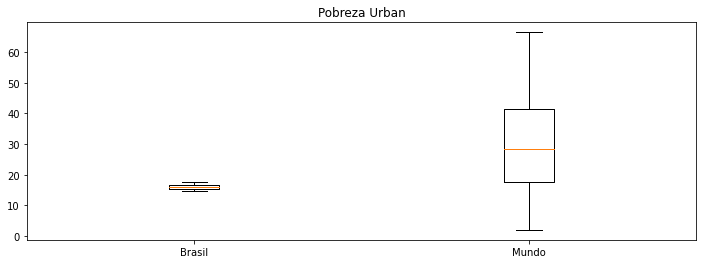

In [24]:
# Gráfico boxplot Pobreza Urbana Brasil e no Mundo
# Podemos observar que a pobreza urbana no Brasil é menor que a média mundial.

plt.figure(figsize=(12,4))
plt.boxplot(dfUrban4[dfUrban4.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfUrban4.valor,positions=[2],showfliers=False)
plt.title('Pobreza Urban')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

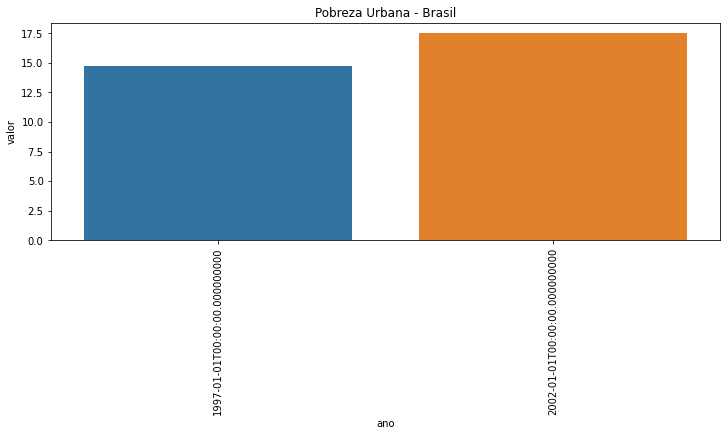

In [25]:
# Gráfico de barras Pobreza Urbana no Brasil
# É possível observar o aumento da pobreza urbana no Brasil entre 1997 e 2002.

plt.figure(figsize=(12,4))
sns.barplot(x=dfUrban4[dfUrban4.country == 'Brazil'].ano, y=dfUrban4[dfUrban4.country == 'Brazil'].valor)
plt.title('Pobreza Urbana - Brasil')
plt.xticks(rotation=90)
plt.show()

### **Realizando a comparação**

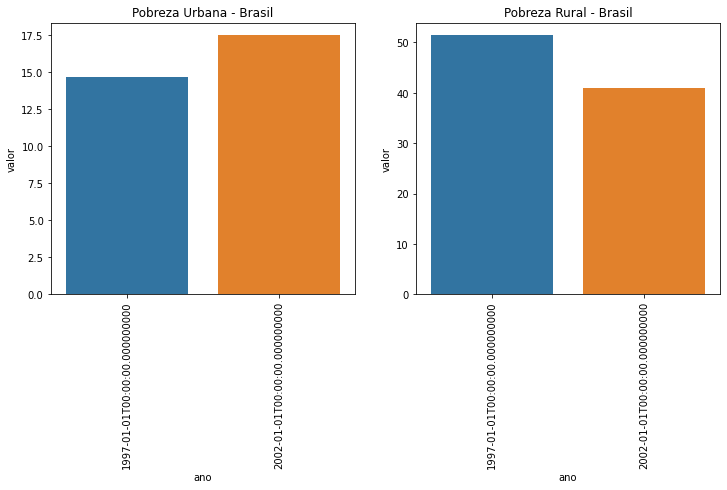

In [26]:
# Gráfico comparativo entre pobreza urbana x pobreza rural no Brasil
# É possivel obsevar aumento da pobreza urbana e redução da pobreza rural no Brasil. Pelo campo valor é possivel observar que a pobreza rural é muito maior.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=dfUrban4[dfUrban4.country == 'Brazil'].ano, y=dfUrban4[dfUrban4.country == 'Brazil'].valor)
plt.title('Pobreza Urbana - Brasil')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(x=dfRural4[dfRural4.country == 'Brazil'].ano, y=dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')
plt.xticks(rotation=90)

plt.show()